In [1]:
#Implement Tarrataca’s quantum production system with the 3-puzzle problem


In [2]:
# Import necessary modules from Qiskit and plotting libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit.library import GroverOperator
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit_aer import AerSimulator

In [4]:
# Define a function to create the quantum circuit for solving the 3-puzzle problem
def create_3_puzzle_circuit():
    """Create the quantum circuit for solving the 3-puzzle problem using Grover's algorithm."""
    # Initialize quantum and classical registers
    qr = QuantumRegister(3, 'q')  # Quantum register with 3 qubits for the puzzle
    cr = ClassicalRegister(3, 'c')  # Classical register for measurement
    qc = QuantumCircuit(qr, cr)

    # Initial state |000>
    # CNOT gates to exchange positions of qubits (represent tile swaps)
    qc.cx(qr[0], qr[1])  # Swap qubit positions between q0 and q1
    qc.cx(qr[1], qr[2])  # Swap qubit positions between q1 and q2

    # Apply Hadamard gates to put qubits into superposition
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])

    # Define a simple oracle for the 3-puzzle problem
    oracle = QuantumCircuit(3)
    oracle.z(0)  # Placeholder oracle condition (modify based on specific puzzle configuration)
    oracle_gate = oracle.to_gate(label="Oracle")  # Convert oracle to a gate for Grover's operator
    # Grover operator with the defined oracle
    grover_operator = GroverOperator(oracle)
    qc.append(grover_operator, qr)  # Append Grover's operator to the circuit

    # Measure the qubits and store the results in the classical register
    qc.measure(qr, cr)
    return qc

In [5]:
# Create the 3-puzzle quantum circuit
qc = create_3_puzzle_circuit()

# Set up the Aer simulator for executing the circuit
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)

# Execute the circuit on the simulator, using 1024 shots to gather measurement statistics
job = simulator.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Output the result
print("Measurement results from the 3-puzzle quantum circuit:")
print(counts)

Measurement results from the 3-puzzle quantum circuit:
{'101': 134, '000': 115, '110': 134, '010': 124, '001': 132, '111': 145, '011': 120, '100': 120}


C:\Users\Om\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


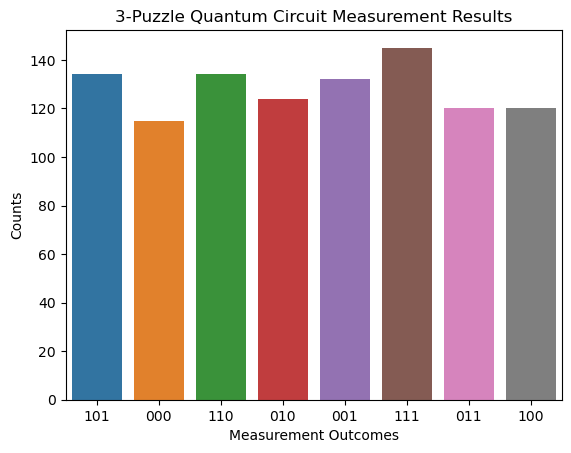

In [6]:
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('3-Puzzle Quantum Circuit Measurement Results')
plt.show()